In [1]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('dataset.csv')

# Step 2: Identify missing values
print("Missing Values per Column:")
print(df.isnull().sum())

# Step 3: Handle missing values
# Since 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', and 'body_mass_g' are critical for analysis,
# we will drop rows where any of these are missing.
df_cleaned = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

# For the 'sex' column, we'll fill missing values with the most frequent value.
df_cleaned['sex'].fillna(df_cleaned['sex'].mode()[0], inplace=True)

# Step 4: Identify incorrect data (e.g., extremely high body mass)
# A quick summary of the statistics to spot any potential outliers
print("\nSummary Statistics:")
print(df_cleaned.describe())

# From the stats, let's say we notice 'body_mass_g' has an unusually high value (15000), we will consider it an outlier.
# Let's filter such unrealistic outliers based on reasonable biological ranges for penguins.
# Assuming a reasonable range for 'body_mass_g' is between 2500 and 6000 grams, we will filter out rows outside this range.

df_cleaned = df_cleaned[(df_cleaned['body_mass_g'] > 2500) & (df_cleaned['body_mass_g'] < 6000)]

# Step 5: Final check for missing values and summary
print("\nMissing Values after Cleaning:")
print(df_cleaned.isnull().sum())

print("\nFinal Cleaned Dataset Preview:")
print(df_cleaned.head())

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


Missing Values per Column:
species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

Summary Statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g
count      337.000000     337.000000         337.000000    337.000000
mean        43.876855      17.172404         200.759644   4267.878338
std          5.478600       1.972831          13.939232   1120.304896
min         32.100000      13.100000         172.000000   2700.000000
25%         39.200000      15.600000         190.000000   3550.000000
50%         44.100000      17.300000         197.000000   4050.000000
75%         48.500000      18.700000         213.000000   4750.000000
max         59.600000      21.500000         231.000000  15000.000000

Missing Values after Cleaning:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm

C:\Users\swath\AppData\Local\Temp\ipykernel_26612\1146404483.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sex'].fillna(df_cleaned['sex'].mode()[0], inplace=True)


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

# Filter the data for Gentoo penguins
gentoo_penguins = df[df['species'] == 'Gentoo']

# Calculate the average body mass for Gentoo penguins
average_body_mass = gentoo_penguins['body_mass_g'].mean()

print(f"The average body mass for Gentoo penguins is {average_body_mass:.2f} grams.")


The average body mass for Gentoo penguins is 5133.74 grams.



Species: Adelie
Bill Length - Skewness: 0.16, Kurtosis: -0.19
Bill Depth - Skewness: 0.32, Kurtosis: -0.10

Species: Gentoo
Bill Length - Skewness: 0.68, Kurtosis: 1.23
Bill Depth - Skewness: 0.34, Kurtosis: -0.56

Species: Chinstrap
Bill Length - Skewness: -0.12, Kurtosis: -0.04
Bill Depth - Skewness: -0.00, Kurtosis: -0.93


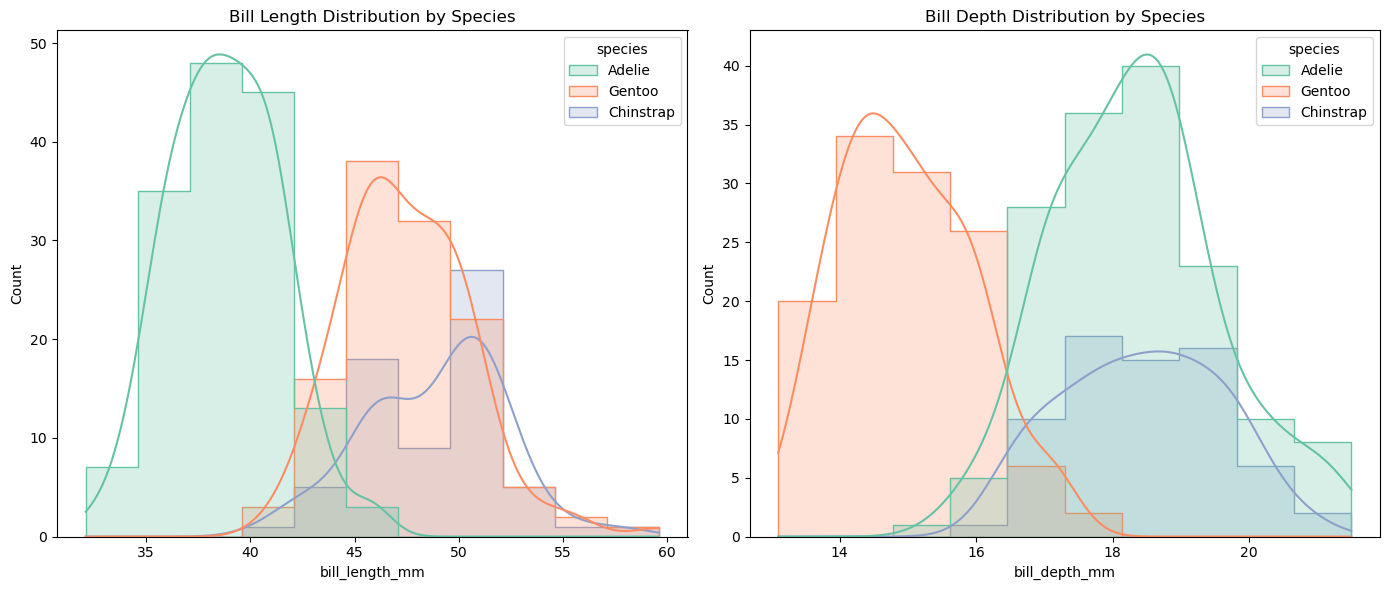

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load the dataset
df = pd.read_csv('dataset.csv')

# Filter rows that have valid species, bill_length_mm, and bill_depth_mm values
df_cleaned = df.dropna(subset=['species', 'bill_length_mm', 'bill_depth_mm'])

# List of penguin species
species_list = df_cleaned['species'].unique()

# Function to calculate skewness and kurtosis
def calc_skew_kurt(df, species, feature):
    data = df[df['species'] == species][feature]
    skew_val = skew(data)
    kurt_val = kurtosis(data)
    return skew_val, kurt_val

# Analyze skewness and kurtosis for each species and feature
for species in species_list:
    print(f"\nSpecies: {species}")
    
    # Bill Length
    bill_length_skew, bill_length_kurt = calc_skew_kurt(df_cleaned, species, 'bill_length_mm')
    print(f"Bill Length - Skewness: {bill_length_skew:.2f}, Kurtosis: {bill_length_kurt:.2f}")
    
    # Bill Depth
    bill_depth_skew, bill_depth_kurt = calc_skew_kurt(df_cleaned, species, 'bill_depth_mm')
    print(f"Bill Depth - Skewness: {bill_depth_skew:.2f}, Kurtosis: {bill_depth_kurt:.2f}")

# Visualizing the distributions
plt.figure(figsize=(14, 6))

# Plot bill_length_mm
plt.subplot(1, 2, 1)
sns.histplot(data=df_cleaned, x='bill_length_mm', hue='species', kde=True, element='step', palette='Set2')
plt.title('Bill Length Distribution by Species')

# Plot bill_depth_mm
plt.subplot(1, 2, 2)
sns.histplot(data=df_cleaned, x='bill_depth_mm', hue='species', kde=True, element='step', palette='Set2')
plt.title('Bill Depth Distribution by Species')

plt.tight_layout()
plt.show()



Outliers in bill_length_mm:
Empty DataFrame
Columns: [bill_length_mm]
Index: []

Outliers in bill_depth_mm:
Empty DataFrame
Columns: [bill_depth_mm]
Index: []

Outliers in flipper_length_mm:
Empty DataFrame
Columns: [flipper_length_mm]
Index: []

Outliers in body_mass_g:
     body_mass_g
73       15000.0
206      12000.0
324      10000.0


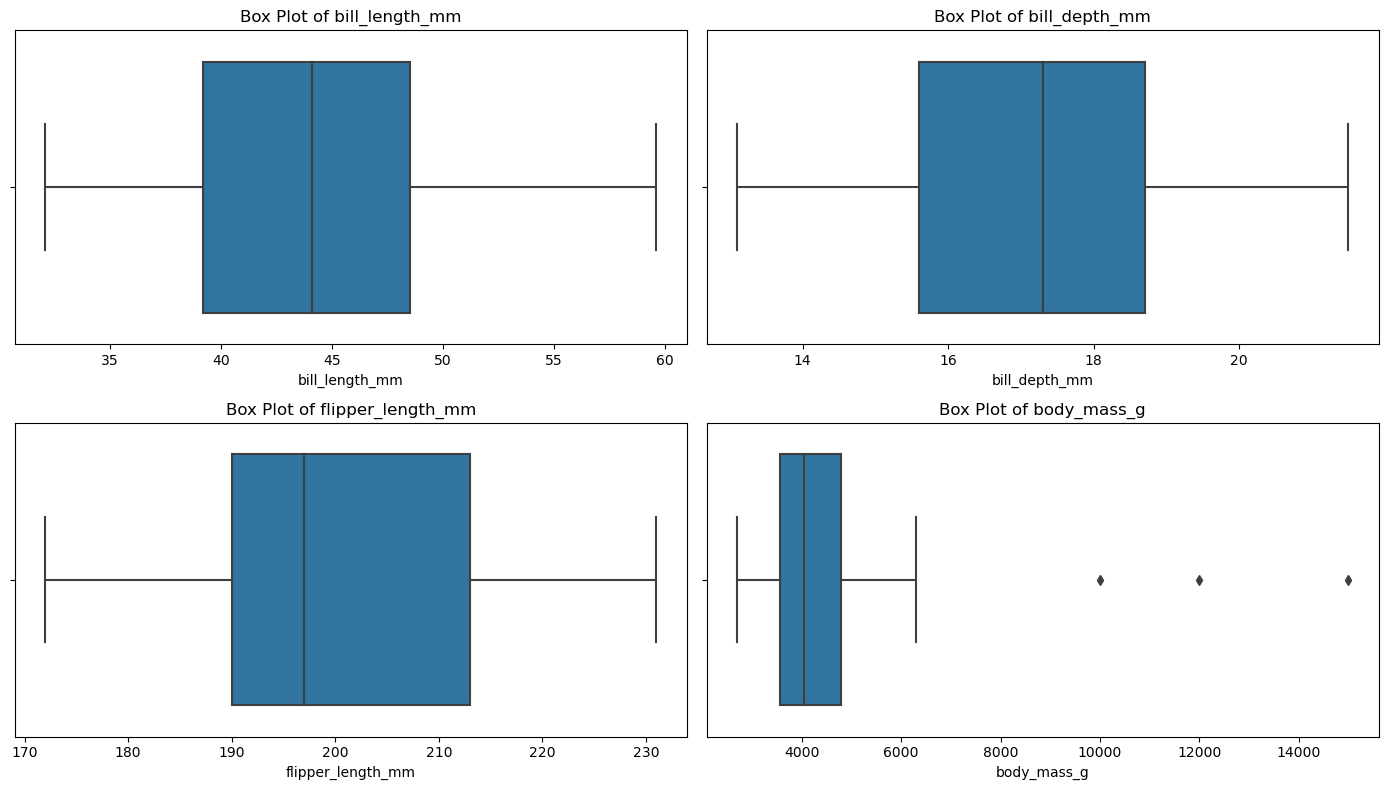

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('dataset.csv')

# Step 2: List of numerical columns to check for outliers
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Step 3: Function to detect outliers using the IQR method
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Step 4: Detect outliers for each feature
for feature in numerical_features:
    outliers = detect_outliers_iqr(df, feature)
    print(f"\nOutliers in {feature}:")
    print(outliers[[feature]])

# Step 5: Visualizing outliers using box plots
plt.figure(figsize=(14, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()


C:\Users\swath\AppData\Local\Temp\ipykernel_26612\55188874.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sex_encoded'] = label_encoder.fit_transform(df_cleaned['sex'].fillna('unknown'))
C:\Users\swath\AppData\Local\Temp\ipykernel_26612\55188874.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['species_encoded'] = label_encoder.fit_transform(df_cleaned['species'])


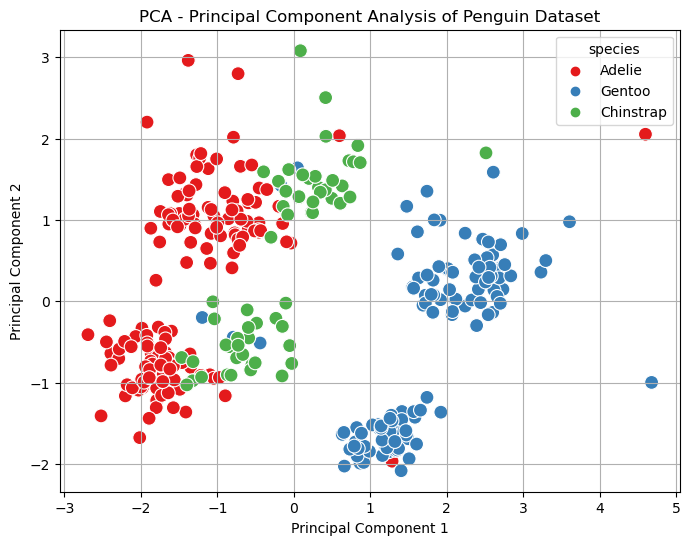

Explained variance by PC1 and PC2: [0.50480472 0.26317891]


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('dataset.csv')

# Step 2: Data Cleaning - Drop rows with missing numerical values
df_cleaned = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

# Step 3: Encode categorical variables (sex and species)
label_encoder = LabelEncoder()

# Encode 'sex'
df_cleaned['sex_encoded'] = label_encoder.fit_transform(df_cleaned['sex'].fillna('unknown'))

# Encode 'species'
df_cleaned['species_encoded'] = label_encoder.fit_transform(df_cleaned['species'])

# Step 4: Select the features for PCA (exclude island for now)
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_encoded']

# Step 5: Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[features])

# Step 6: Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['species'] = df_cleaned['species']

# Step 7: Visualize the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set1', s=100)
plt.title('PCA - Principal Component Analysis of Penguin Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Step 8: Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1 and PC2: {explained_variance}")


C:\Users\swath\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\swath\AppData\Local\Temp\ipykernel_26612\837137935.py:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


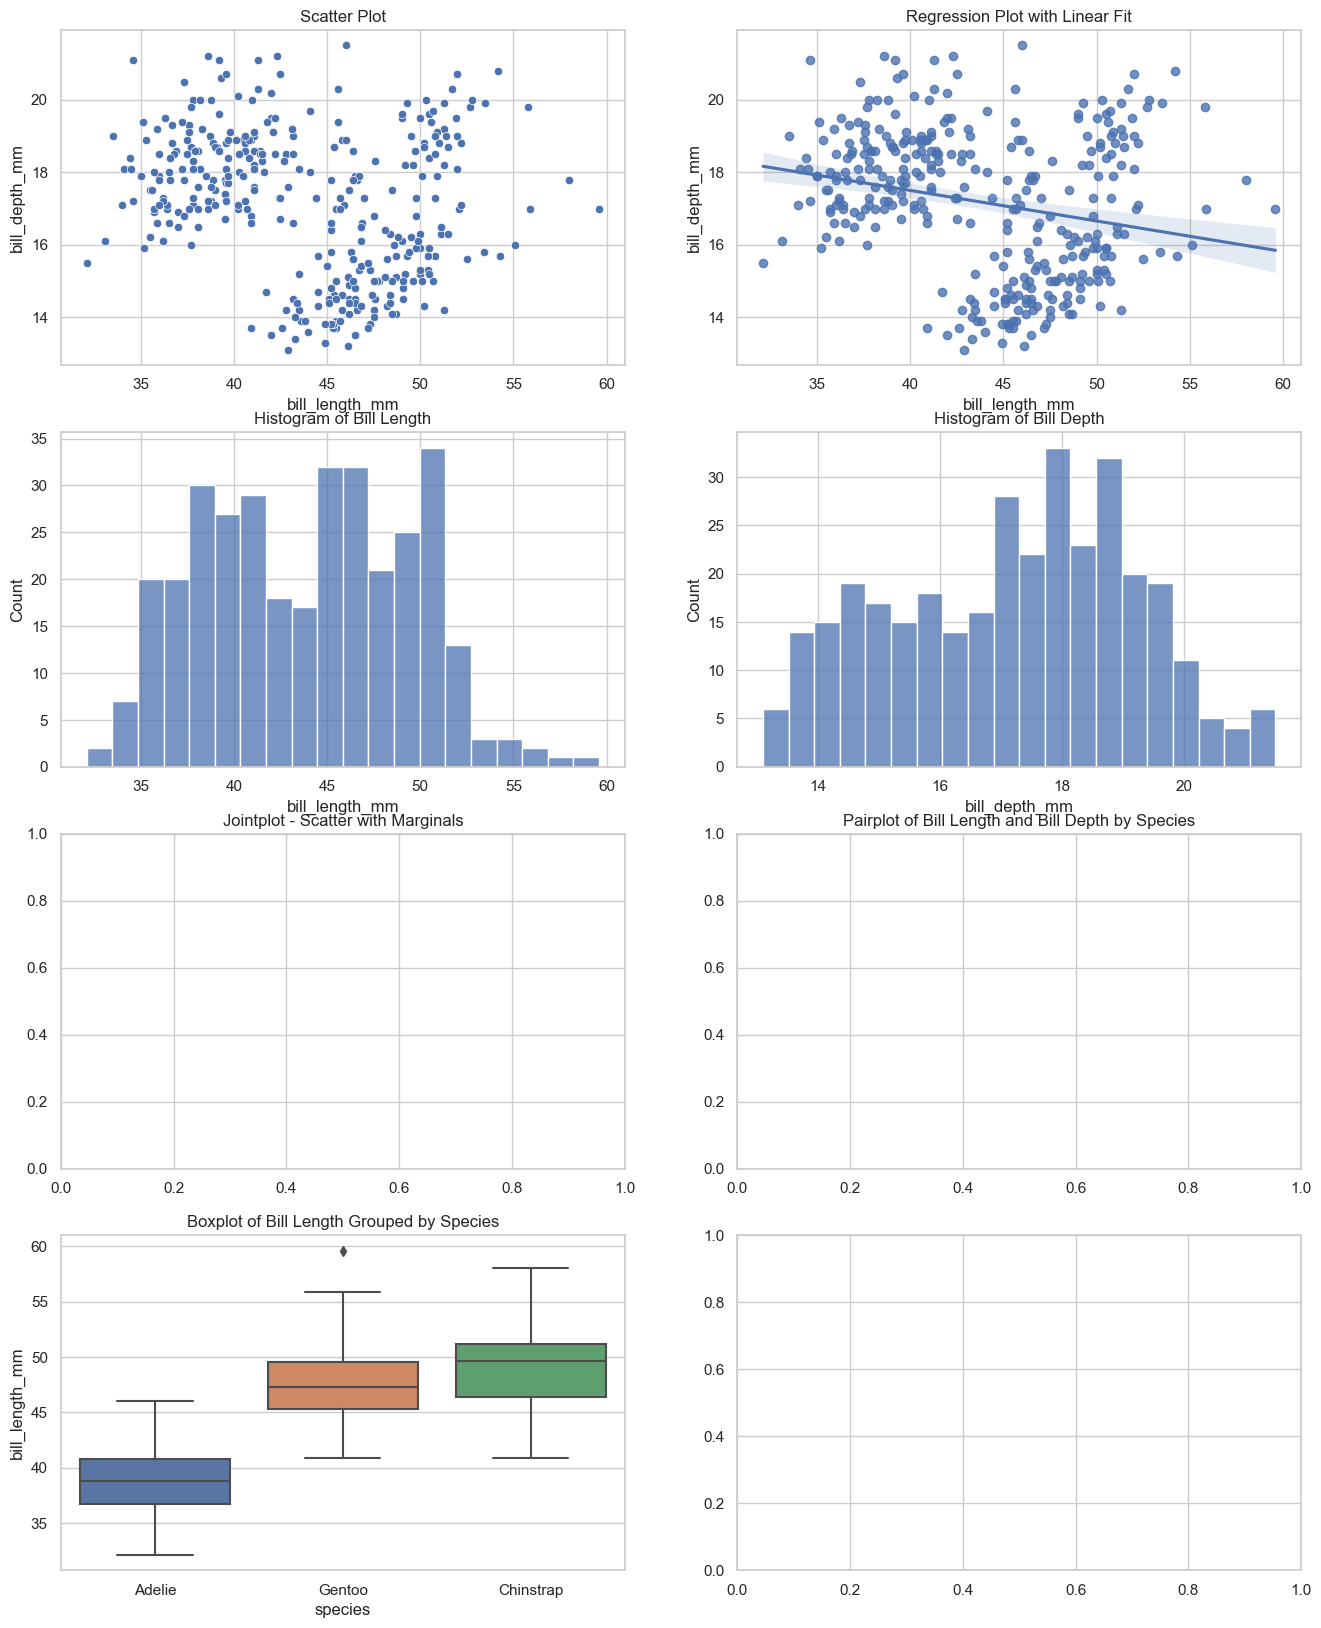

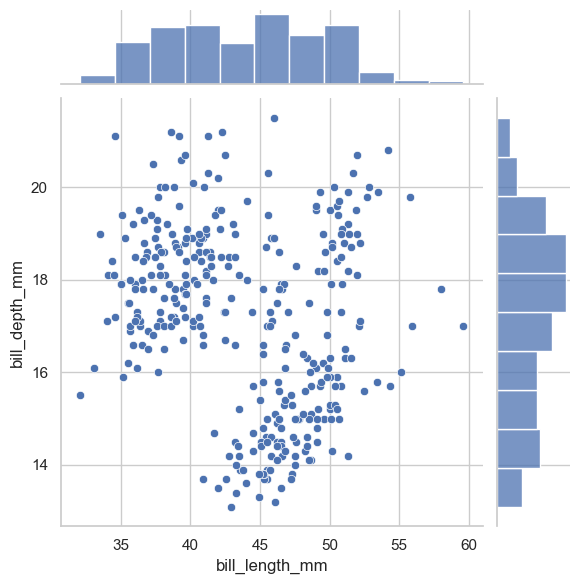

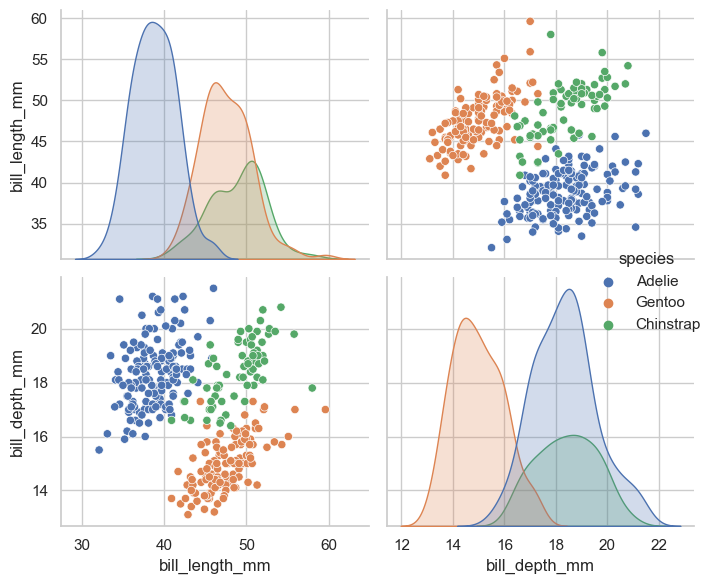

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset.csv')

# Clean the dataset: Remove rows with missing values for bill_length_mm and bill_depth_mm
df_cleaned = df.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Initialize the figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

# 1. Scatter plot (simple)
sns.scatterplot(data=df_cleaned, x='bill_length_mm', y='bill_depth_mm', ax=axes[0])
axes[0].set_title("Scatter Plot")

# 2. Regression plot with linear fit
sns.regplot(data=df_cleaned, x='bill_length_mm', y='bill_depth_mm', ax=axes[1])
axes[1].set_title("Regression Plot with Linear Fit")

# 3. Histogram of bill_length_mm
sns.histplot(data=df_cleaned, x='bill_length_mm', bins=20, ax=axes[2])
axes[2].set_title("Histogram of Bill Length")

# 4. Histogram of bill_depth_mm
sns.histplot(data=df_cleaned, x='bill_depth_mm', bins=20, ax=axes[3])
axes[3].set_title("Histogram of Bill Depth")

# 5. Jointplot (scatter plot with marginal histograms)
sns.jointplot(data=df_cleaned, x='bill_length_mm', y='bill_depth_mm', kind='scatter', height=6)
axes[4].set_title("Jointplot - Scatter with Marginals")  # This one will appear separately below.

# 6. Pairplot with species hue
sns.pairplot(df_cleaned[['bill_length_mm', 'bill_depth_mm', 'species']], hue='species', height=3)
axes[5].set_title("Pairplot of Bill Length and Bill Depth by Species")

# 7. Boxplot of bill_length_mm grouped by species
sns.boxplot(data=df_cleaned, x='species', y='bill_length_mm', ax=axes[6])
axes[6].set_title("Boxplot of Bill Length Grouped by Species")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

# Drop rows where flipper_length_mm is missing
df_cleaned = df.dropna(subset=['flipper_length_mm'])

# Group by 'species' and 'island', then find the maximum flipper_length_mm for each group
max_flipper_by_species_island = df_cleaned.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Find the species with the longest flippers on each island
longest_flipper_by_island = max_flipper_by_species_island.loc[max_flipper_by_species_island.groupby('island')['flipper_length_mm'].idxmax()]

# Display the result
print("Maximum flipper_length_mm for each combination of species and island:")
print(max_flipper_by_species_island)

print("\nSpecies with the longest flippers on each island:")
print(longest_flipper_by_island)


Maximum flipper_length_mm for each combination of species and island:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('dataset.csv')

# Select numerical columns (excluding non-numeric columns like species, island, and sex)
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Drop rows with missing values in the numerical columns to avoid errors during normalization
df_cleaned = df.dropna(subset=numeric_cols)

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply z-score normalization only on the numeric columns
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Show the normalized dataframe
print("Z-score normalized dataset:")
print(df_cleaned.head())


Z-score normalized dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.873208       0.775468          -1.419664   
1  Adelie  Torgersen       -0.800088       0.115537          -1.060431   
2  Adelie  Torgersen       -0.653848       0.420121          -0.413811   
4  Adelie  Torgersen       -1.311928       1.080052          -0.557504   
5  Adelie  Torgersen       -0.836648       1.739983          -0.773044   

   body_mass_g     sex  
0    -0.462953    male  
1    -0.418256  female  
2    -0.909924  female  
4    -0.731135  female  
5    -0.552347    male  


C:\Users\swath\AppData\Local\Temp\ipykernel_26612\219159366.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])
